In [ ]:
# Import Library

import pandas as pd
import xgboost
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

In [ ]:
# Drive Mount_Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Load
excel_path = '/content/drive/MyDrive/LiveCommerse/FUCKUGOOGLE/투어전문몰.xlsx'

In [ ]:
# Data Load and Check features
df = pd.read_excel(excel_path)
# df = pd.read_excel('/Users/jang/Library/CloudStorage/GoogleDrive-gkfua00@gmail.com/내 드라이브/LiveCommerse/FUCKUGOOGLE/종합몰.xlsx') # for Mac
df.columns

Index(['Channel_Name', 'Channel_Number', 'Channel_Subscriber',
       'Channel_Num_Video', 'Channel_Rank', 'Service_Level', 'Age_1', 'Age_2',
       'Male_Rate', 'Female_Rate', 'Video_Number', 'Total_Chat', 'Non_Event',
       'Chat_User', 'Positive', 'Negative', 'Neutral', 'Average_Score',
       'Hello_Word', 'Question', 'View_Number', 'M1', 'M2', 'F1', 'F2', 'M1F1',
       'Average_Chat', 'Rate_Hello', 'Rate_Question', 'Rate_Chat',
       'Rate_ChatUser'],
      dtype='object')

In [ ]:
# Select Feature
df_x = df[['Channel_Subscriber',
       'Channel_Num_Video', 'Total_Chat', 'Non_Event',
       'Chat_User',
       'View_Number', 'M1', 'M2', 'F1', 'F2',
       'M1F1','Average_Chat', 'Rate_Hello', 'Rate_Question', 'Rate_Chat',
       'Rate_ChatUser']]
df_y = df['Average_Score']

In [ ]:
# Drop NA
df_x.dropna(axis=0, inplace=True)
df_y.dropna(axis=0, inplace=True)

In [ ]:
# MinMax Scalar
scaler = MinMaxScaler()
df_x[:] = scaler.fit_transform(df_x[:])

In [ ]:
# XGB Model Fit
X = df_x
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.01, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

118 30


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
data_dmatrix = xgboost.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 6, 'alpha': 10}
cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=10,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True)

In [ ]:
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))


0    0.199398
Name: test-rmse-mean, dtype: float64


In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred

array([0.41931066, 0.40835255, 0.46125948, 0.43660188, 0.5118563 ,
       0.48742157, 0.6940159 , 0.4672908 , 0.47898132, 0.45083943,
       0.38796866, 0.7152311 , 0.50025606, 0.55877155, 0.56487685,
       0.52727336, 0.41768384, 0.42019826, 0.40890765, 0.43400875,
       0.41408285, 0.5661454 , 0.56667113, 0.47525558, 0.45054337,
       0.48795506, 0.50906134, 0.4218054 , 0.42365924, 0.5105711 ],
      dtype=float32)

In [ ]:
y_test = np.array(y_test)

In [ ]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
print(explained_variance_score(y_pred,y_test))

0.7498973789093852
RMSE: 0.159928
-2.871562421900341


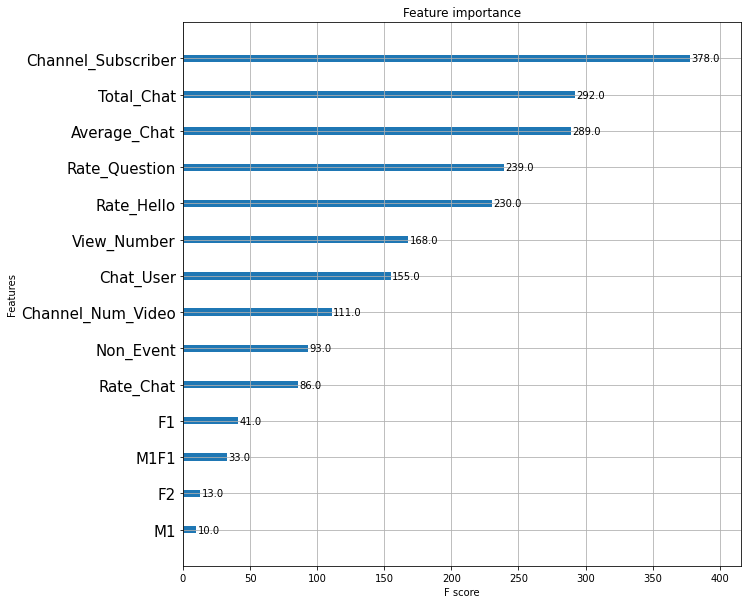

In [ ]:
from xgboost import plot_importance
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 10
plot_importance(xgb_model)
plt.yticks(fontsize=15)
plt.show()